In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys, os, scipy, sklearn
import sklearn.metrics, sklearn.preprocessing, sklearn.model_selection, sklearn.tree, sklearn.linear_model, sklearn.cluster

In [53]:
from google.colab import files
uploaded = files.upload()

Saving auto-mpg.csv to auto-mpg.csv


In [2]:
wisconsin = pd.read_csv('wisconsin.csv')
wisconsin.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
wisconsin['diagnosis'] = np.where(wisconsin['diagnosis'] == 'M', 0, 1)
wisconsin.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
wisconsin.shape

(569, 33)

In [5]:
X = wisconsin[['radius_mean', 'concave points_mean']]
X.head(3)

,radius_mean,concave points_mean
0,17.99,0.14710
1,20.57,0.07017
2,19.69,0.12790


In [6]:
y = wisconsin['diagnosis']
y.head(3)

0    0
1    0
2    0
Name: diagnosis, dtype: int32

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2)

In [9]:
SEED = 1

# Train your first classification tree

1. Import DecisionTreeClassifier from sklearn.tree.
2. Instantiate a DecisionTreeClassifier dt of maximum depth equal to 6.
3. Fit dt to the training set.
4. Predict the test set labels and assign the result to y_pred.

In [18]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[1 1 1 1 0]


## Evaluate the classification tree

1. Import the function accuracy_score from sklearn.metrics.
2. Predict the test set labels and assign the obtained array to y_pred.
3. Evaluate the test set accuracy score of dt by calling accuracy_score() and assign the value to acc.

In [25]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_pred, y_test)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.92


## Logistic regression vs classification tree

1. Import LogisticRegression from sklearn.linear_model.
2. Instantiate a LogisticRegression model and assign it to logreg.
3. Fit logreg to the training set.
4. Review the plot generated by plot_labeled_decision_regions().

**HINT!**

Call .fit() on logreg and pass the training set and labels to fit the logistic regression model.

In [29]:
!pip install mlxtend  


  Using cached mlxtend-0.20.0-py2.py3-none-any.whl (1.3 MB)


In [31]:
import mlxtend.plotting

def plot_labeled_decision_regions(X_test, y_test, clfs):
    
    for clf in clfs:

        mlxtend.plotting.plot_decision_regions(np.array(X_test), np.array(y_test), clf=clf, legend=2)
        
        plt.ylim((0,0.2))

        # Adding axes annotations
        plt.xlabel(X_test.columns[0])
        plt.ylabel(X_test.columns[1])
        plt.title(str(clf).split('(')[0])
        plt.show()

In [32]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression

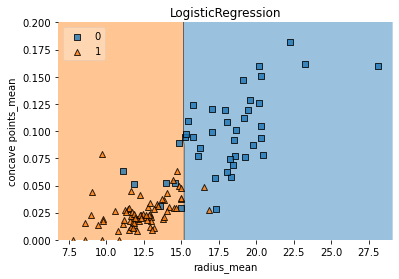

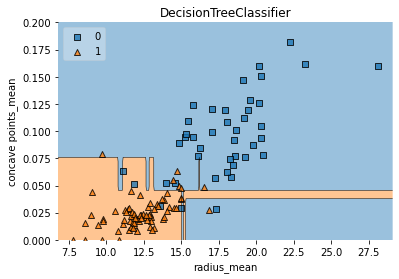

In [34]:
# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_test, y_test)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

## Using entropy as a criterion

1. Import DecisionTreeClassifier from sklearn.tree.
2. Instantiate a DecisionTreeClassifier dt_entropy with a maximum depth of 8.
3. Set the information criterion to 'entropy'.
4. Fit dt_entropy on the training set.

In [39]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

In [40]:


# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

## Using GINI as a criterion

1. Import DecisionTreeClassifier from sklearn.tree.
2. Instantiate a DecisionTreeClassifier dt_gini with a maximum depth of 8.
3. Set the information criterion to 'gini'.
4. Fit dt_gini on the training set.

In [41]:
# Import DecisionTreeClassifier from sklearn.tree
#from ____.____ import ____

# Instantiate dt_gini, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)

# Fit dt_gini to the training set
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

## Entropy vs Gini index

1. Import accuracy_score from sklearn.metrics.
2. Predict the test set labels of dt_entropy and assign the result to y_pred.
3. Evaluate the test set accuracy of dt_entropy and assign the result to accuracy_entropy.
4. Review accuracy_entropy and accuracy_gini.

In [42]:
y_pred = dt_gini.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred)

In [44]:
# Import accuracy_score from sklearn.metrics
#from ____.____ import ____

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)

Accuracy achieved by using entropy:  0.9298245614035088
Accuracy achieved by using the gini index:  0.9210526315789473


## Train your first regression tree

1. Import DecisionTreeRegressor from sklearn.tree.
2. Instantiate a DecisionTreeRegressor dt with maximum depth 8 and min_samples_leaf set to 0.13.
3. Fit dt to the training set.

In [45]:
auto = pd.read_csv('auto.csv')
auto.head()

FileNotFoundError: [Errno 2] No such file or directory: 'auto.csv'

In [57]:
X = auto[['displ', 'hp', 'weight', 'accel', 'size', 'origin']]
y = ['mpg']

In [40]:
OneHotEncoder = sklearn.preprocessing.OneHotEncoder()
OneHotEncodings = OneHotEncoder.fit_transform(auto[['origin']]).toarray()
OneHotEncodings = pd.DataFrame(OneHotEncodings,
                               columns = ['origin_'+header for header in OneHotEncoder.categories_[0]])

X = X.drop(columns = 'origin').reset_index(drop=True)
X = pd.concat((X,OneHotEncodings),axis=1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
print(X_train.shape,y_train.shape)

(313, 8) (313,)


In [44]:
# Import DecisionTreeRegressor from sklearn.tree
from ____.____ import ____

# Instantiate dt
____ = ____(max_depth=____,
             ____=____,
            random_state=3)

# Fit dt to the training set
____.____(____, ____)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.13, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=3, splitter='best')

## Evaluate the regression tree

1. Import the function mean_squared_error as MSE from sklearn.metrics.
2. Predict the test set labels and assign the output to y_pred.
3. Compute the test set MSE by calling MSE and assign the result to mse_dt.
4. Compute the test set RMSE and assign it to rmse_dt.

In [45]:
# Import mean_squared_error from sklearn.metrics as MSE
from ____.____ import ____ as ____

# Compute y_pred
____ = ____.____(____)

# Compute mse_dt
____ = ____(____, ____)

# Compute rmse_dt
____ = ____

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 3.89
